# Concrete Strength Project
In this case study, our task is to create a machine learning model which can predict the strength of concrete based on its material composition. Analyze which ingredient affects the strength and which one does not matter much.

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

## 1. Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "ConcreteStrengthData.csv". This file contains 1031 concrete strength data.

### Data description
The business meaning of each column in the data is as below

* <b>CementComponent</b>: How much cement is mixed
* <b>BlastFurnaceSlag</b>: How much Blast Furnace Slag is mixed
* <b>FlyAshComponent</b>: How much FlyAsh is mixed
* <b>WaterComponent</b>: How much water is mixed
* <b>SuperplasticizerComponent</b>: How much Super plasticizer is mixed
* <b>CoarseAggregateComponent</b>: How much Coarse Aggregate is mixed
* <b>FineAggregateComponent</b>: How much Coarse Aggregate is mixed
* <b>AgeInDays</b>: How many days it was left dry
* <b>Strength</b>: What was the final strength of concrete

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
import pandas as pd
import numpy as np
ConcreteStrengthData=pd.read_csv('D:/IVY/7_ML/ALL Python ML notebooks/Python Datasets/Regression Datasets/ConcreteStrengthData.csv', encoding='latin')
print('Shape before deleting duplicates:',ConcreteStrengthData.shape)

# Removing duplicate rows if any
ConcreteStrengthData=ConcreteStrengthData.drop_duplicates()
print('Shape after deleting duplicates:',ConcreteStrengthData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
ConcreteStrengthData.head(10)

Shape before deleting duplicates: (1030, 9)
Shape after deleting duplicates: (1005, 9)


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


## 2. Defining the problem statement:
Create a ML model which predict the strength of concrete based on its material composition
* Target Variable: Strength
* Predictors: CementComponent, WaterComponent, CoarseAggregateComponent, AgeInDays etc.

## 3. Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

## 4. Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

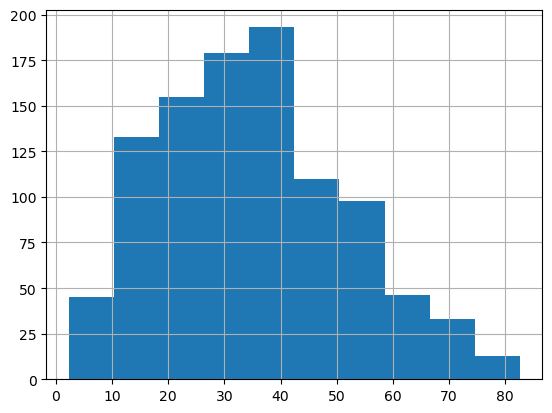

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
ConcreteStrengthData['Strength'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

## 5. Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the Strength of the concrete?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.
​
There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [5]:
# Looking at sample rows in the data
ConcreteStrengthData.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
ConcreteStrengthData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1005 non-null   float64
 1   BlastFurnaceSlag           1005 non-null   float64
 2   FlyAshComponent            1005 non-null   float64
 3   WaterComponent             1005 non-null   float64
 4   SuperplasticizerComponent  1005 non-null   float64
 5   CoarseAggregateComponent   1005 non-null   float64
 6   FineAggregateComponent     1005 non-null   float64
 7   AgeInDays                  1005 non-null   int64  
 8   Strength                   1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [7]:
# Looking at the descriptive statistics of the data
ConcreteStrengthData.describe(include='all')

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
ConcreteStrengthData.nunique()

CementComponent              278
BlastFurnaceSlag             185
FlyAshComponent              156
WaterComponent               195
SuperplasticizerComponent    111
CoarseAggregateComponent     284
FineAggregateComponent       302
AgeInDays                     14
Strength                     845
dtype: int64

#### Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created


* <b>Strength</b>: Continuous. Selected. This is the <b>Target Variable!</b>
* <b>CementComponent</b>: Continuous. Selected.
* <b>BlastFurnaceSlag</b>: Continuous. Selected.
* <b>FlyAshComponent</b>: Continuous. Selected.
* <b>WaterComponent</b>: Continuous. Selected.
* <b>SuperplasticizerComponent</b>: Continuous. Selected.
* <b>CoarseAggregateComponent</b>: Continuous. Selected.
* <b>FineAggregateComponent</b>: Continuous. Selected.
* <b>AgeInDays</b>: Continuous. Selected.

## 6. Removing useless columns from the data
There are no qualitative columns in this data

## 7. Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

#### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Categorical Predictors:
There are no categorical variable

#### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Eight continuous predictor variables 'CementComponent', 'BlastFurnaceSlag' ,
'FlyAshComponent' , 'WaterComponent' , 'SuperplasticizerComponent' , 'CoarseAggregateComponent' , 'FineAggregateComponent' and
'AgeInDays'.

array([[<AxesSubplot:title={'center':'CementComponent '}>,
        <AxesSubplot:title={'center':'BlastFurnaceSlag'}>,
        <AxesSubplot:title={'center':'FlyAshComponent'}>],
       [<AxesSubplot:title={'center':'WaterComponent'}>,
        <AxesSubplot:title={'center':'SuperplasticizerComponent'}>,
        <AxesSubplot:title={'center':'CoarseAggregateComponent'}>],
       [<AxesSubplot:title={'center':'FineAggregateComponent'}>,
        <AxesSubplot:title={'center':'AgeInDays'}>, <AxesSubplot:>]],
      dtype=object)

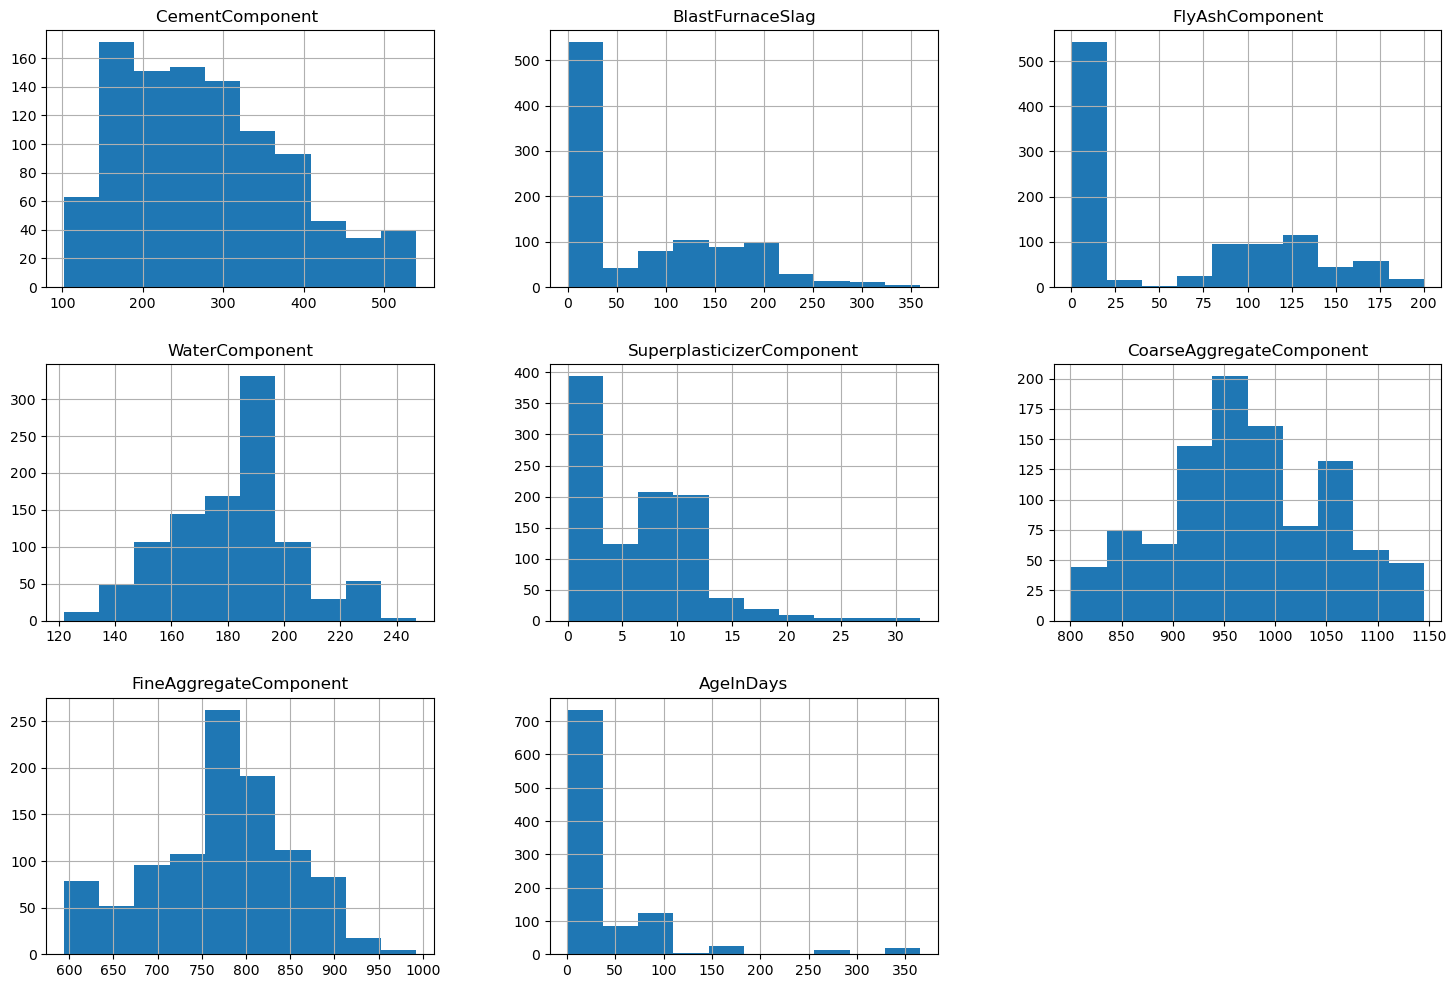

In [9]:
list(ConcreteStrengthData.columns)

# Plotting histograms of multiple columns together
ConcreteStrengthData.hist(['CementComponent ',
                            'BlastFurnaceSlag' ,
                            'FlyAshComponent',
                            'WaterComponent',
                            'SuperplasticizerComponent',
                            'CoarseAggregateComponent',
                            'FineAggregateComponent',
                            'AgeInDays'], figsize=(18,12))                       

#### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "AgeInDays", there are around 750 rows in data that has a value between 0 to 50.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

* <b>CementComponent</b>: Selected. The distribution is good.
* <b>BlastFurnaceSlag</b>: Selected. The distribution is good.
* <b>FlyAshComponent</b>: Selected. The distribution is good.
* <b>WaterComponent</b>: Selected. The distribution is good.
* <b>SuperplasticizerComponent</b>: Selected. The distribution is good.
* <b>CoarseAggregateComponent</b>: Selected. The distribution is good.
* <b>FineAggregateComponent</b>: Selected. The distribution is good.
* <b>AgeInDays</b>: Selected.The distribution is Skewed but tail is thick, hence acceptable

## 8. Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.
* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

#### No outliers in this data.

## 9. Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables

In [10]:
# Finding how many missing values are there for each column
ConcreteStrengthData.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

#### No missing values in this data.

## 10. Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.
### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

#### In this case study the Target variable is Continuous, hence below two scenarios will be present
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

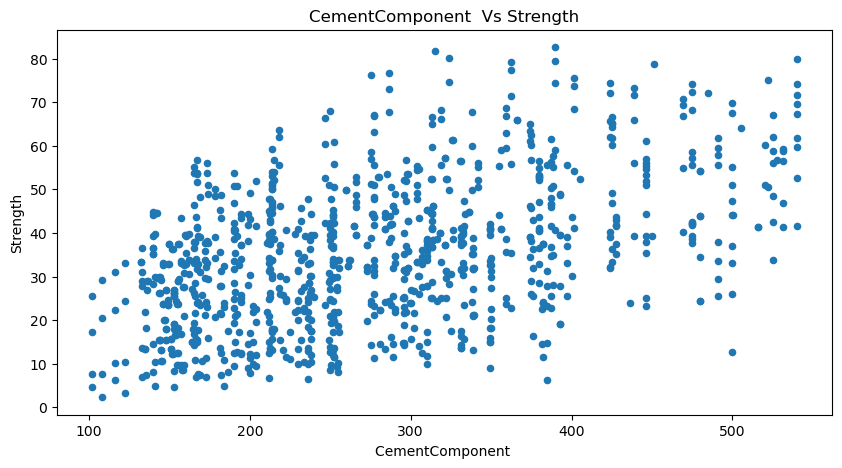

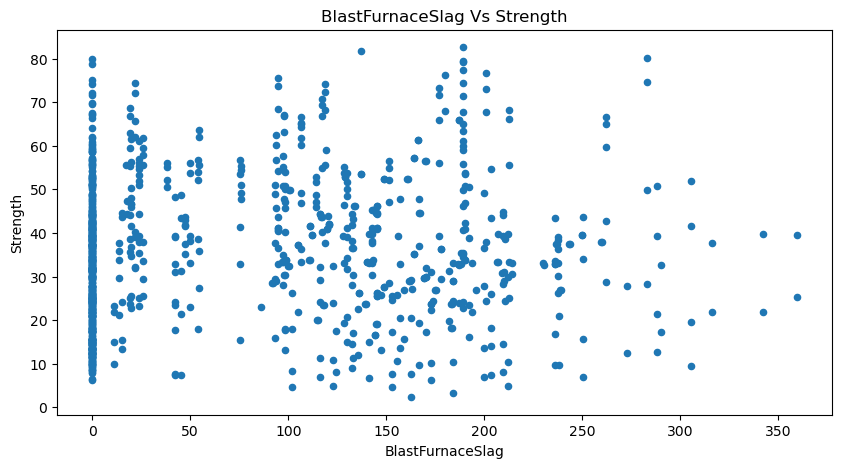

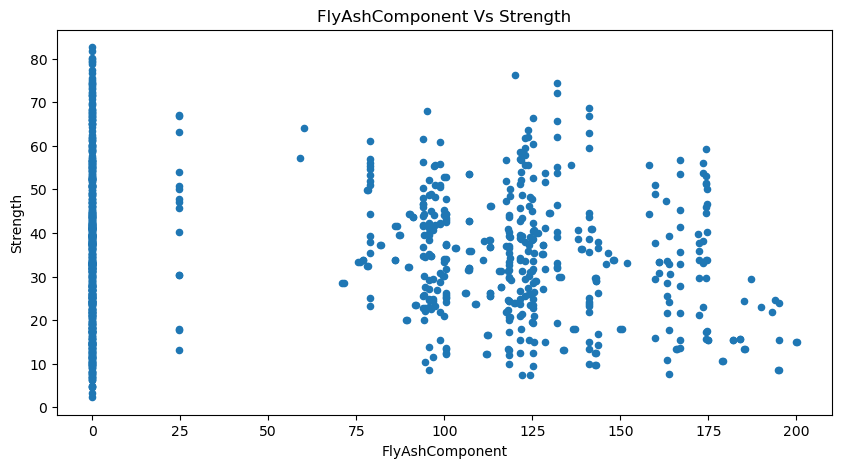

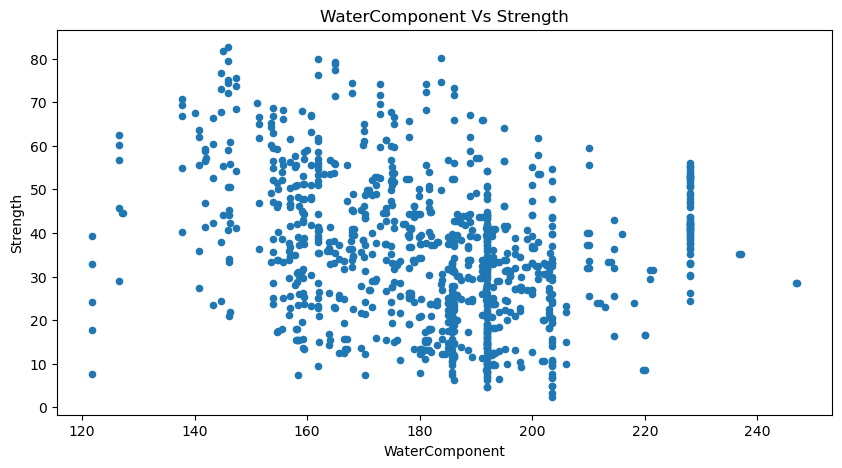

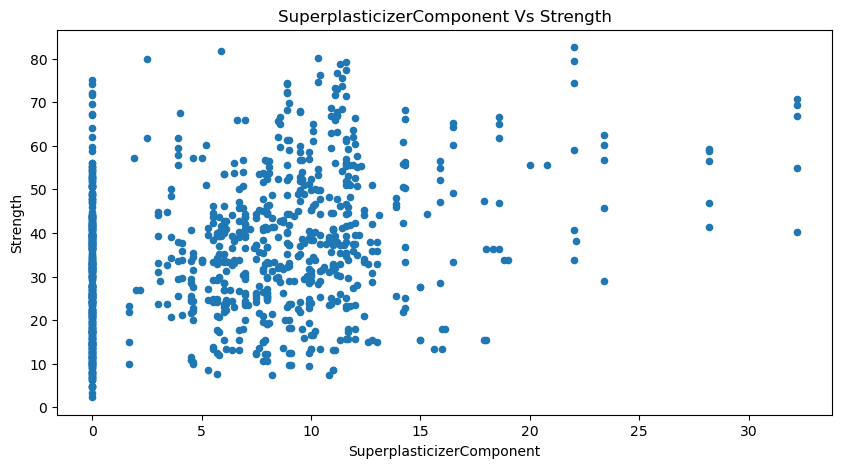

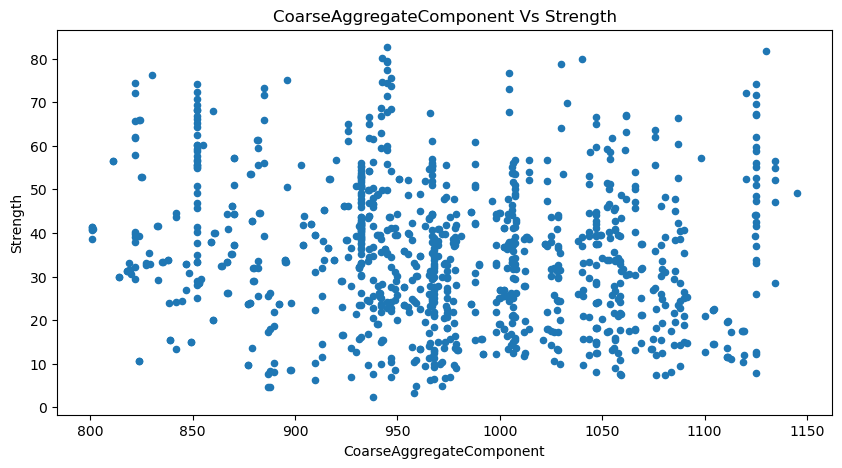

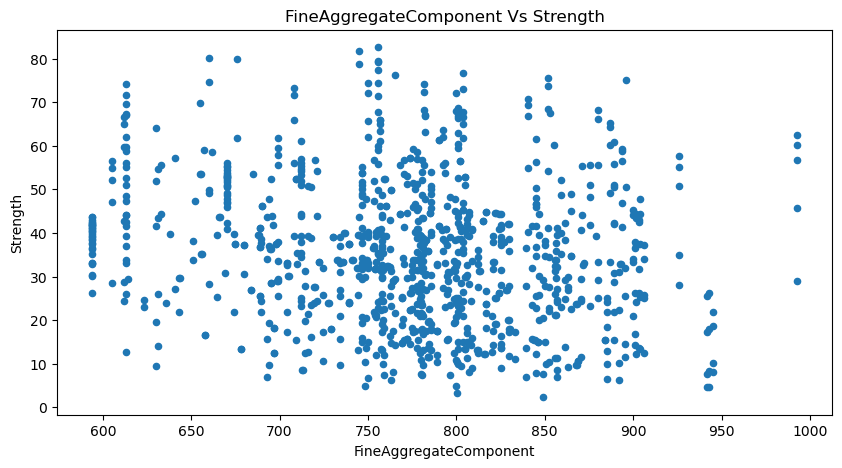

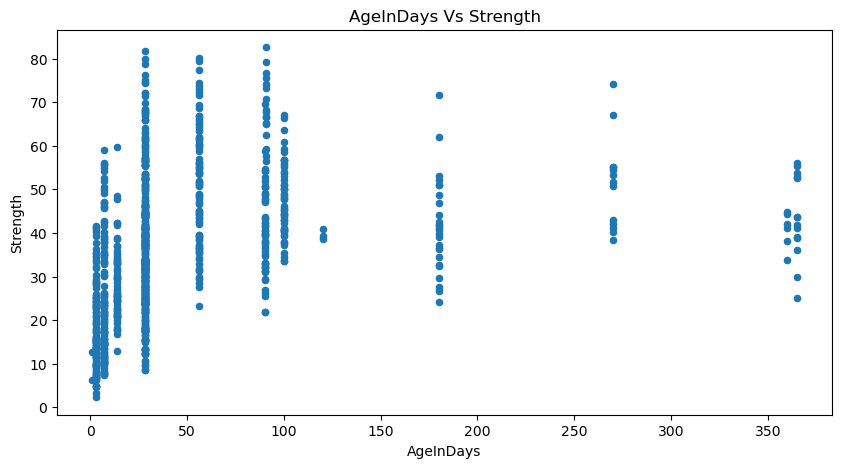

In [11]:
ContinuousCols=['CementComponent ','BlastFurnaceSlag','FlyAshComponent','WaterComponent','SuperplasticizerComponent',
                       'CoarseAggregateComponent','FineAggregateComponent','AgeInDays']    

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    ConcreteStrengthData.plot.scatter(x=predictor, y='Strength', figsize=(10,5), title=predictor+" Vs "+'Strength')      
                            

### Scatter charts interpretation
<b>What should you look for in these scatter charts? </b>

Trend.
You should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not.
You confirm this by looking at the correlation value.

### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

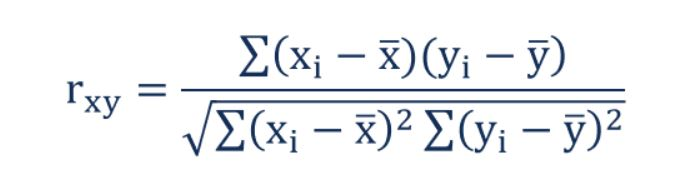

This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [12]:
# Calculating correlation matrix
ContinuousCols=['Strength','CementComponent ','BlastFurnaceSlag','FlyAshComponent','WaterComponent','SuperplasticizerComponent',
                       'CoarseAggregateComponent','FineAggregateComponent','AgeInDays']    

# Creating the correlation matrix
CorrelationData=ConcreteStrengthData[ContinuousCols].corr()
CorrelationData

,Strength,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
Strength,1.000000,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367
CementComponent,0.488283,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348
BlastFurnaceSlag,0.103374,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759
FlyAshComponent,-0.080648,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940
WaterComponent,-0.269624,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284
SuperplasticizerComponent,0.344209,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076
CoarseAggregateComponent,-0.144717,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264
FineAggregateComponent,-0.186448,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572
AgeInDays,0.337367,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000


In [13]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Strength'][abs(CorrelationData['Strength'])> 0.3]

Strength                     1.000000
CementComponent              0.488283
SuperplasticizerComponent    0.344209
AgeInDays                    0.337367
Name: Strength, dtype: float64

#### Final selected Continuous columns:

'CementComponent','SuperplasticizerComponent','AgeInDays'

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

There are no categorical columns in this data.

### Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [14]:
SelectedColumns=['Strength','CementComponent ','SuperplasticizerComponent','AgeInDays']

#Selecting final columns
DataForML=ConcreteStrengthData[SelectedColumns]
DataForML.head()

,Strength,CementComponent,SuperplasticizerComponent,AgeInDays
0,79.99,540.0,2.5,28
1,61.89,540.0,2.5,28
2,40.27,332.5,0.0,270
3,41.05,332.5,0.0,365
4,44.30,198.6,0.0,360


In [15]:
# Saving this final data in serialized format for reference during deployment
DataForML.to_pickle('DataForML.pkl')
import os
os.getcwd()

'C:\\Users\\payel\\PythonML_IVY'

In [16]:
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')

## 11. Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

#### 1. Converting each Ordinal Categorical columns to numeric
In this data there is no Ordinal categorical variable which is in string format.

#### 2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
There is no binary nominal variable in string format to be converted

#### 3. Converting all other nominal categorical columns to numeric using pd.get_dummies()

In [17]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Strength']=ConcreteStrengthData['Strength']

# Printing sample rows
DataForML_Numeric.head()

,Strength,CementComponent,SuperplasticizerComponent,AgeInDays
0,79.99,540.0,2.5,28
1,61.89,540.0,2.5,28
2,40.27,332.5,0.0,270
3,41.05,332.5,0.0,365
4,44.30,198.6,0.0,360


## 12. Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [18]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Strength', 'CementComponent ', 'SuperplasticizerComponent',
       'AgeInDays'],
      dtype='object')

In [19]:
# Separate Target Variable and Predictor Variables
TargetVariable='Strength'
Predictors=['CementComponent ','SuperplasticizerComponent','AgeInDays']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

In [20]:
X_train[0:6]

array([[250. ,   5.3,   3. ],
       [167.4,   7.8,  28. ],
       [233.8,   4.6,   3. ],
       [173.5,   6.5,  14. ],
       [531.3,  28.2,  91. ],
       [323.7,  10.3,   7. ]])

In [21]:
y_train[0:6]

array([ 8.49, 41.2 , 10.38, 33.01, 59.2 , 49.8 ])

## 13. Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [22]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [23]:
PredictorScalerFit.inverse_transform(X)

array([[540. ,   2.5,  28. ],
       [540. ,   2.5,  28. ],
       [332.5,   0. , 270. ],
       ...,
       [148.5,   6.1,  28. ],
       [159.1,  11.3,  28. ],
       [260.9,   8.6,  28. ]])

In [24]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(703, 3)
(703,)
(302, 3)
(302,)


In [25]:
X_train[0:6]

array([[0.50228311, 0.2484472 , 0.07417582],
       [0.41552511, 0.17080745, 0.1510989 ],
       [0.6347032 , 0.        , 0.73901099],
       [0.63356164, 0.49378882, 0.24725275],
       [0.52283105, 0.2484472 , 0.07417582],
       [0.34703196, 0.        , 0.00549451]])

In [26]:
y_train[0:6]

array([52.42, 44.52, 41.15, 56.5 , 56.61,  9.31])

## 14.1. Multiple Linear Regression

In [27]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale
# Only if you have stadardized the target variable as well

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')
prediction=LREG.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

# Printing sample prediction values
print(TestingDataResults.head())

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.4765791082871217

##### Model Validation and Accuracy Calculations ######
   CementComponent   SuperplasticizerComponent  AgeInDays  Strength  \
0          0.132420                   0.341615   0.074176     32.84   
1          0.526256                   0.000000   1.000000     41.05   
2          0.014384                   0.000000   0.005495      2.33   
3          0.400000                   0.347826   0.074176     63.14   
4          0.085845                   0.000000   0.005495      8.06   

   PredictedStrength         APE  
0               31.0    5.602923  
1               62.0   51.035323  
2               13.0  457.939914  
3               39.0   38.232499  
4               15.0   86.104218  
Mean Accuracy on test data: 61.079406626640925
Median Accuracy on test data: 74.61592045877998

Accuracy values for 10-fold Cross Validation:
 [66.11624942 68.98716338 66.13454779 66.25073037 70.39528526 48.94465308
 41.5930605  57.14493174 63.19198007 62.96

## 14.2. Decision Trees

DecisionTreeRegressor(max_depth=8)
R2 Value: 0.8798590577165575

##### Model Validation and Accuracy Calculations ######
   Strength  PredictedStrength        APE
0     32.84               27.0  17.783191
1     41.05               36.0  12.302071
2      2.33                3.0  28.755365
3     63.14               44.0  30.313589
4      8.06                6.0  25.558313
Mean Accuracy on test data: 76.98480049086204
Median Accuracy on test data: 83.15506808744472

Accuracy values for 10-fold Cross Validation:
 [76.5810029  76.22850002 75.93674027 76.6744047  79.62402693 68.08183465
 66.92581506 75.28925439 75.98150221 73.6734571 ]

Final Average Accuracy of the model: 74.5


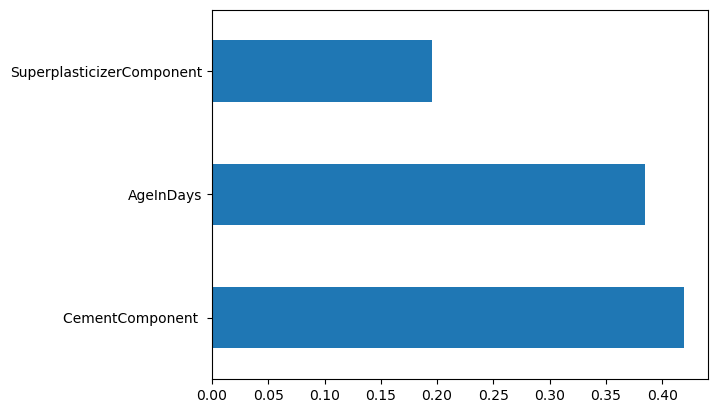

In [28]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel=DecisionTreeRegressor(max_depth=8, criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)
# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])


# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### Plotting a Decision Tree

In [29]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt
# pip install graphviz
# conda install graphviz
# pip install pydotplus

# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

In [30]:
np.var(y_train)

266.05523289660846

In [31]:
np.mean(y_train)

35.25473684210527

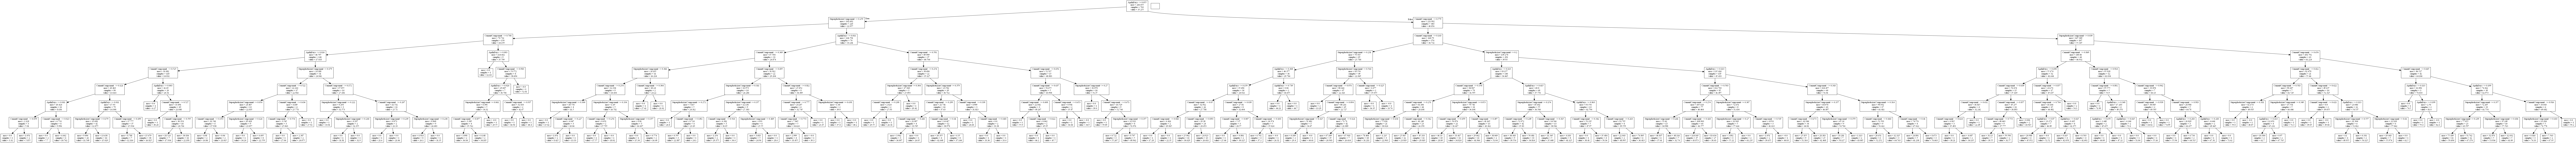

In [32]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## 14.3. Random Forest

RandomForestRegressor(max_depth=6)
R2 Value: 0.8435067339154259

##### Model Validation and Accuracy Calculations ######
   Strength  PredictedStrength
0     32.84               26.0
1     41.05               41.0
2      2.33                8.0
3     63.14               45.0
4      8.06                9.0
Mean Accuracy on test data: 77.66821584823674
Median Accuracy on test data: 84.76219884255548

Accuracy values for 10-fold Cross Validation:
 [80.62675453 77.08847837 82.10659056 77.68890228 81.53984472 68.09564268
 65.33073643 74.81894012 73.11632954 71.37639651]

Final Average Accuracy of the model: 75.18


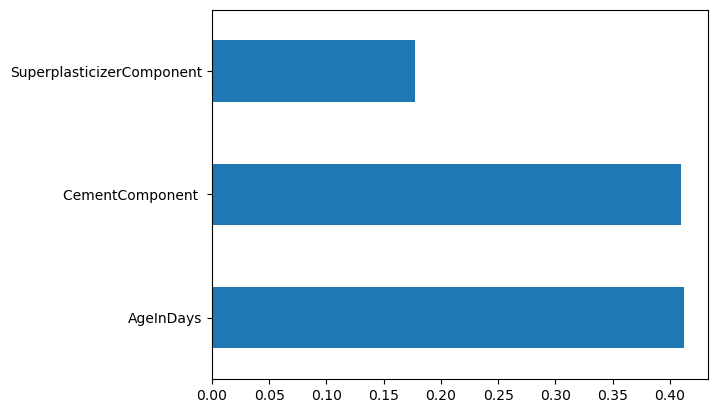

In [33]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=6, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### Plotting one of the Decision Trees in Random Forest

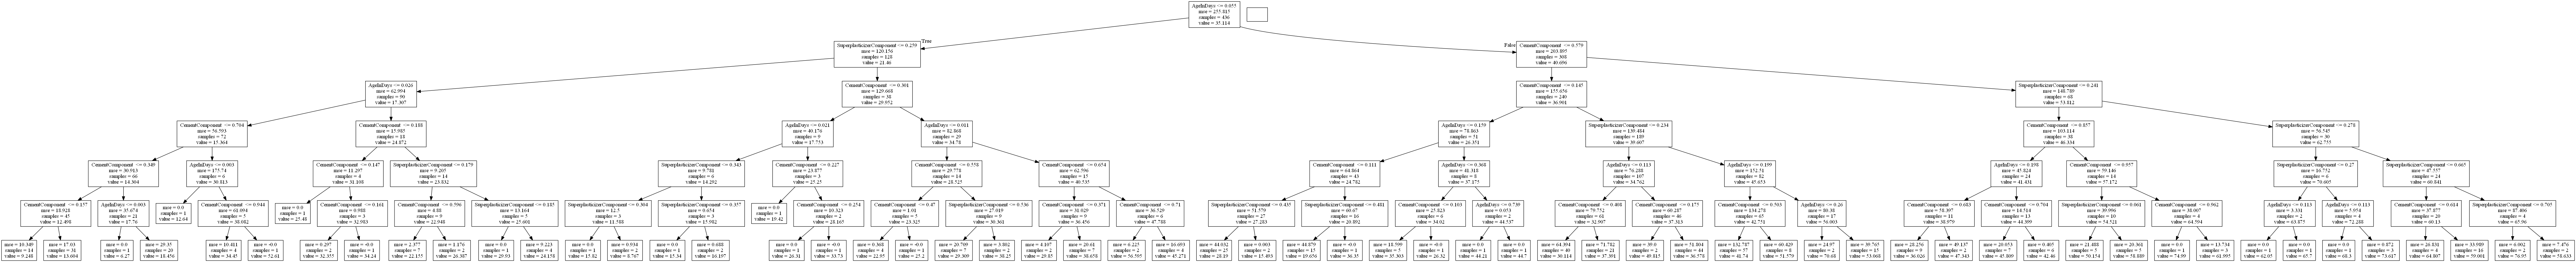

In [34]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1000,height=1000)
# Double click on the graph to zoom in

## 14.4. AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9774623901501466

##### Model Validation and Accuracy Calculations ######
   Strength  PredictedStrength
0     32.84               33.0
1     41.05               39.0
2      2.33                3.0
3     63.14               67.0
4      8.06                5.0
Mean Accuracy on test data: 80.31099937914064
Median Accuracy on test data: 87.42568732639748

Accuracy values for 10-fold Cross Validation:
 [78.71106271 78.95140455 80.42574408 76.98507062 79.84852928 65.3819916
 69.25404487 78.57334215 85.38836583 88.5355968 ]

Final Average Accuracy of the model: 78.21


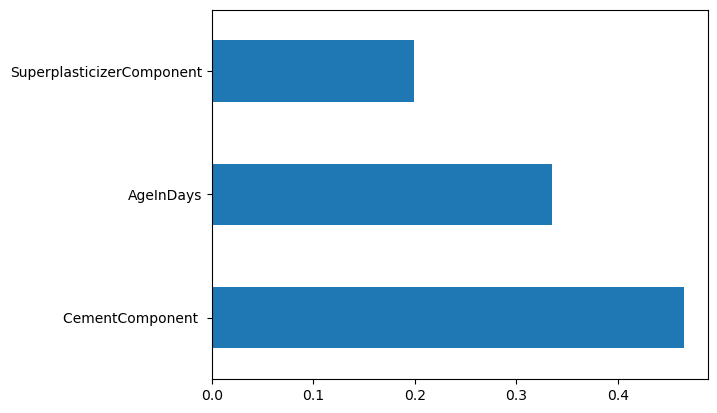

In [35]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 10 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### Plotting one of the Decision trees from Adaboost
 max_depth=10 is too large to plot here


## 14.5. XGBoost


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=None, reg_alpha=None, ...)
[21:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9842187901438665

##### Model Validation and Accuracy Calculations ######

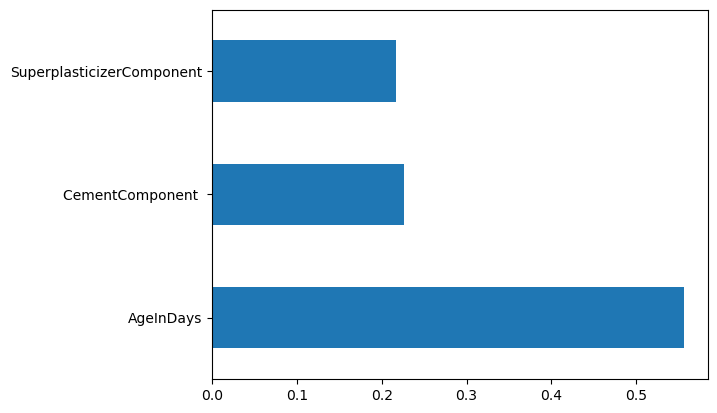

In [36]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### Plotting a single Decision tree out of XGBoost
max_depth=10 is too larget to plot here

## 14.6. KNN

In [37]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=2)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=2)
R2 Value: 0.8886294301403048

##### Model Validation and Accuracy Calculations ######
   Strength  PredictedStrength
0     32.84               24.0
1     41.05               38.0
2      2.33                8.0
3     63.14               40.0
4      8.06               10.0
Mean Accuracy on test data: 74.29414462646612
Median Accuracy on test data: 83.73583189940629

Accuracy values for 10-fold Cross Validation:
 [71.61416284 73.07513565 75.94375156 77.08769335 71.55275585 64.67903849
 69.15132031 76.93945878 74.23026813 76.40047848]

Final Average Accuracy of the model: 73.07


## 15. Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing ADABOOST as the final model since it is producing the best accuracy on this data.

In order to deploy the model we follow below steps

* Train the model using 100% data available
* Save the model as a serialized file which can be stored anywhere
* Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

#### Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'CementComponent ', 'SuperplasticizerComponent', and 'AgeInDays'.

As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [38]:
# Separate Target Variable and Predictor Variables
TargetVariable='Strength'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1005, 3)
(1005,)


#### Cross validating the final model accuracy with less predictors

In [39]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 10 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [77.99508968 78.7786697  80.23599246 76.60720266 80.17515636 65.64119958
 68.9041192  78.70430911 85.80096497 89.23487749]

Final Average Accuracy of the model: 78.21


### Step 1. Retraining the model using 100% data

In [40]:
# Training the model on 100% Data available
Final_ADABOOST_Model=RegModel.fit(X,y)

### Step 2. Save the model as a serialized file which can be stored anywhere

In [41]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoStrengthModel
with open('Final_ADABOOST_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_ADABOOST_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
#print('pickle file of Predictive Model is saved at Location:',os.getcwd())

### Step 3. Create a python function

In [42]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_ADABOOST_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Generating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [43]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[540,2.5,28],
     [332,2.5,270]],
columns=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   CementComponent   SuperplasticizerComponent  AgeInDays
0               540                        2.5         28
1               332                        2.5        270


,Prediction
0,71.0
1,45.0


The Function FunctionPredictResult() can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the cases.

## 15.1. Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

### Creating the model with few parameters

#### Function for predictions API

In [44]:
# Creating the function which can take inputs and perform prediction
def FunctionGeneratePrediction(inp_CementComponent, inp_SuperplasticizerComponent, inp_AgeInDays):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_CementComponent, inp_SuperplasticizerComponent, inp_AgeInDays]],
     columns=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(inp_CementComponent=540, 
                           inp_SuperplasticizerComponent=2.5, 
                           inp_AgeInDays=28
                             )

'{"Prediction":{"0":71.0}}'

In [45]:
# Installing the flask library required to create the API
#!pip install flask

#### Creating Flask API

In [46]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [47]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        cement_value=float(request.args.get('cement'))
        plasticizer_value=float(request.args.get('plasticizer'))
        age_value=float(request.args.get('age'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                        inp_CementComponent=cement_value, 
                                        inp_SuperplasticizerComponent=plasticizer_value, 
                                        inp_AgeInDays=age_value
                                                        )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

#### Starting the API engine

In [48]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit


### Sample URL to call the API

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?cement=369&plasticizer=2.7&age=30

This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.